## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a= 2
b =-1
x_i =np.linspace(0, 20)
y_i = a * x_i + b 
print(x_i)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


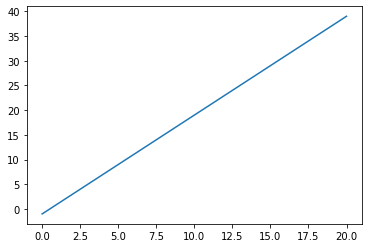

In [4]:
plt.plot(x_i,y_i)

#### Plot your data points. 

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

4077


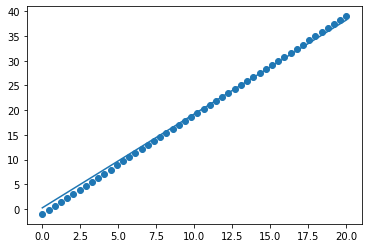

0.22113509013385238
1.9019339174157683


In [34]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    for i in range(numOfItr):
        j= cost(theta0,theta1,x_points,y_points)
        dt0 = difft0(theta0,theta1,x_points,y_points)
        dt1 = difft1(theta0,theta1,x_points,y_points)
        theta0 = theta0 - alpha*dt0
        theta1 = theta1 - alpha*dt1
        if abs(dt0)<0.00001 and abs(dt1)<0.00001:
            break
        elif abs(theta0_all[i]-theta0)<0.00001 and abs(theta1_all[i]-theta1)<0.00001:
            print(i)

            break
        cost_all.append(j)
        theta0_all.append(theta0)
        theta1_all.append(theta1)
    return theta0,theta1




alpha = 0.00001
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,100000)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.9971790600208308

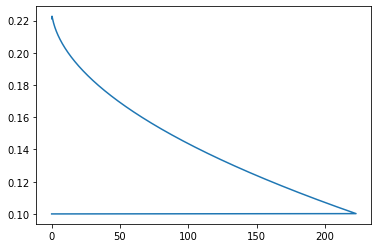

In [23]:
plt.plot(cost_all,theta0_all)

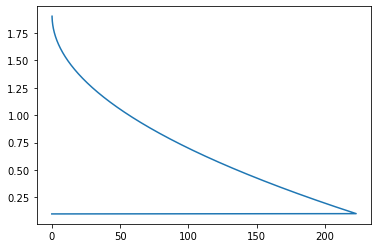

In [24]:
plt.plot(cost_all,theta1_all)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

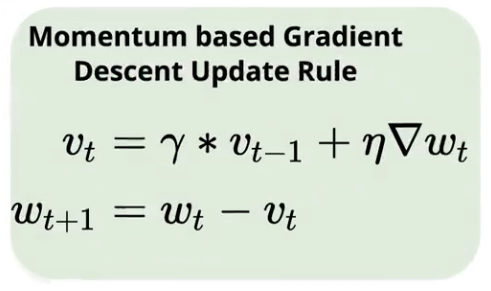

#### γ takes values between 0 and 1.
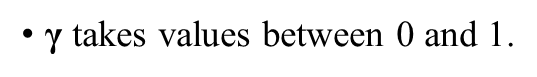

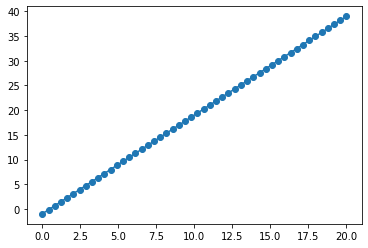

-0.9827601259607253
1.9987176311456825


In [16]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr,gamma):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    v0=0
    v1=0
    for i in range(numOfItr):
        j= cost(theta0,theta1,x_points,y_points)
        dt0 = difft0(theta0,theta1,x_points,y_points)
        dt1 = difft1(theta0,theta1,x_points,y_points)
       
        v0 = (alpha*dt0+gamma*v0)
        v1 = (alpha*dt1+gamma*v1)
        
        theta0 = theta0 - v0

        theta1 = theta1 - v1

        cost_all.append(j)
        theta0_all.append(theta0)
        theta1_all.append(theta1)
    return theta0,theta1




alpha = 0.001
gamma=0.4
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,10000,gamma)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.9999994483484094

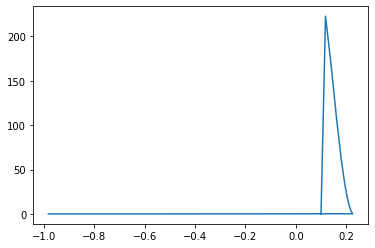

In [18]:
plt.plot(theta0_all,cost_all)

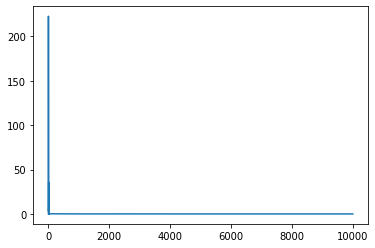

In [15]:
plt.plot(cost_all)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

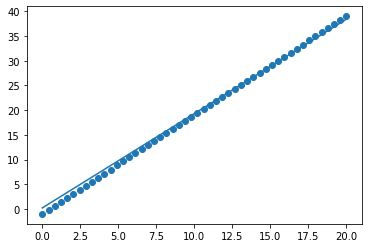

0.2032772653785029
1.9104931949415966


In [57]:
alpha = 0.00001
gamma=0
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,10000,gamma)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

### Update your Batch GD for one variable  implementation to be NAG and check your results

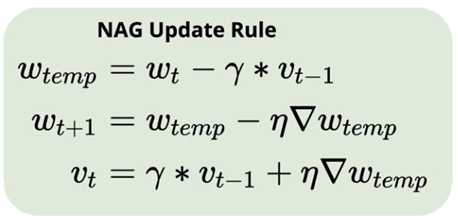

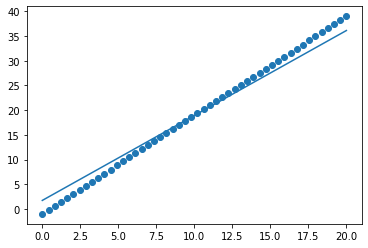

1.7201608552918553
1.7201608552918553


In [93]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr,gamma):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    v0=0
    v1=0
 
    for i in range(numOfItr):
        
        j= cost(theta0,theta1,x_points,y_points)
        theta0_temp=theta0-gamma*v0
        theta1_temp=theta0-gamma*v1
        dt0= difft0(theta0_temp,theta1_temp,x_points,y_points)
        dt1= difft1(theta0_temp,theta1_temp,x_points,y_points)
        theta0=theta0_temp-alpha*dt0
        theta1=theta0_temp-alpha*dt0
        v0=gamma*v0+alpha*dt0
        v1=gamma*v1+alpha*dt1
   
    
        cost_all.append(j)
        theta0_all.append(theta0)
        theta1_all.append(theta1)
    return theta0,theta1




alpha = 0.00001
gamma=0.8
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,10000,gamma)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.980378413088563

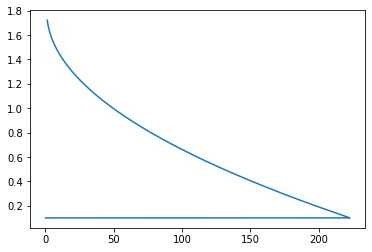

In [95]:
plt.plot(cost_all,theta0_all)

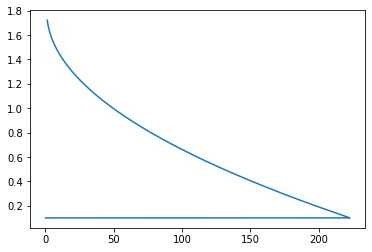

In [96]:
plt.plot(cost_all,theta1_all)

## Congratulations 
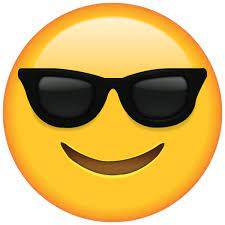